<a href="https://colab.research.google.com/github/bamboo0727/Neural-Network-Model/blob/master/Copy_of_C2_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Housing Dataset
Create a regression model that predicts the price of boston house

In [0]:
!wget https://storage.googleapis.com/nicksdemobucket/housing-data.csv

--2019-03-23 03:08:24--  https://storage.googleapis.com/nicksdemobucket/housing-data.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 816 [application/octet-stream]
Saving to: ‘housing-data.csv.1’

housing-data.csv.1  100%[===================>]     816  --.-KB/s    in 0s      

2019-03-23 03:08:24 (16.8 MB/s) - ‘housing-data.csv.1’ saved [816/816]



In [0]:
import pandas as pd
import numpy as np
df=pd.read_csv('housing-data.csv')

In [0]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [0]:
X=df.drop(['price'],axis=1).values
X.shape

(47, 3)

In [0]:
y=df[['price']].values
y.shape

(47, 1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.train import AdamOptimizer

In [0]:
model = Sequential()

model.add(Dense(3, input_shape=(3,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',
                optimizer=AdamOptimizer(0.01),
                metrics=['mean_absolute_error', 'mean_squared_error'])

In [0]:
h = model.fit(X, y, epochs=100, validation_split=0.2)

Train on 37 samples, validate on 10 samples
Epoch 1/100
37/37 [==============================] - 0s 4ms/sample - loss: 136604117379.4594 - mean_absolute_error: 345746.6875 - mean_squared_error: 136604114944.0000 - val_loss: 111574253568.0000 - val_mean_absolute_error: 321261.7500 - val_mean_squared_error: 111574253568.0000
Epoch 2/100
37/37 [==============================] - 0s 331us/sample - loss: 136571065537.7297 - mean_absolute_error: 345702.8750 - mean_squared_error: 136571076608.0000 - val_loss: 111544721408.0000 - val_mean_absolute_error: 321220.4062 - val_mean_squared_error: 111544721408.0000
Epoch 3/100
37/37 [==============================] - 0s 313us/sample - loss: 136538336505.0811 - mean_absolute_error: 345661.7812 - mean_squared_error: 136538341376.0000 - val_loss: 111515877376.0000 - val_mean_absolute_error: 321180.0312 - val_mean_squared_error: 111515877376.0000
Epoch 4/100
37/37 [==============================] - 0s 359us/sample - loss: 136507291924.7568 - mean_absolut

In [0]:
h.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])

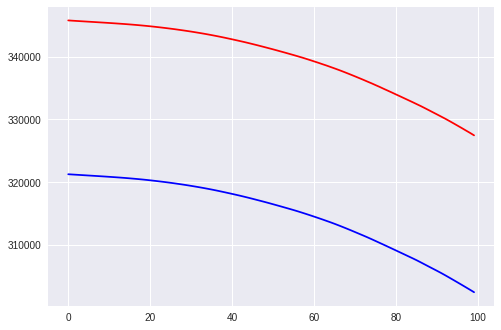

In [0]:
import matplotlib.pyplot as plt
plt.plot(h.history['mean_absolute_error'],color='r')
plt.plot(h.history['val_mean_absolute_error'],color='b')

# Binary Classification
Create a binary classifier for the titanic dataset, will person x survive?

In [0]:
!wget https://storage.googleapis.com/nicksdemobucket/titanic-train.csv
  

--2019-03-23 03:08:29--  https://storage.googleapis.com/nicksdemobucket/titanic-train.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [application/octet-stream]
Saving to: ‘titanic-train.csv.3’

titanic-train.csv.3 100%[===================>]  59.76K  --.-KB/s    in 0.001s  

2019-03-23 03:08:29 (89.9 MB/s) - ‘titanic-train.csv.3’ saved [61194/61194]



In [0]:
import pandas as pd
from sklearn import preprocessing

import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.train import AdamOptimizer

from sklearn.preprocessing import OneHotEncoder

In [0]:
df=pd.read_csv('titanic-train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
sns.pairplot(df, hue='Survived')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
df['Embarked'] = df['Embarked'].fillna('S')
df['Age']=df['Age'].fillna(df['Age'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
Fare_scaled = preprocessing.scale(df['Fare'])
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)


In [0]:
df['Sex']=df['Sex'].map({'female':0,'male':1}).astype(int)


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [0]:
X=df.drop(['Survived','Name','Ticket','Cabin'],axis=1).values
X.shape

(891, 8)

In [0]:
y = pd.get_dummies(df['Survived']).values
y.shape

(891, 2)

In [0]:
model = Sequential()

model.add(Dense(16, input_shape=(8,), activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=AdamOptimizer(0.01),
             loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
h = model.fit(X, y, epochs=200, batch_size=16, validation_split=0.2)

In [0]:
h.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

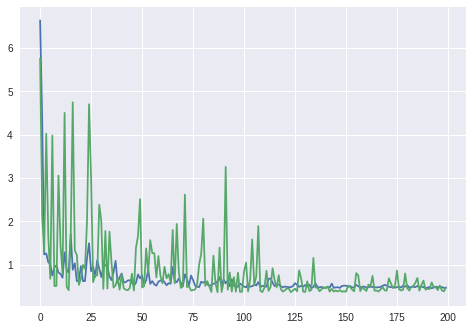

In [0]:
import matplotlib.pyplot as plt
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

# MNIST
See how well a fully connected Neural Network performs on MNSIT

In [0]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

Using TensorFlow backend.


In [0]:
from tensorflow.train import AdamOptimizer

from sklearn.preprocessing import OneHotEncoder

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

# Preparing the dataset
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Making a copy before flattening for the next code-segment which displays images
x_train_drawing = x_train

print(x_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


In [0]:
# We will build a fully connected neural network,which means our input data 
# must be a vector. Then we will flatten the images with reshape
image_size = 784 # 28 x 28
x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

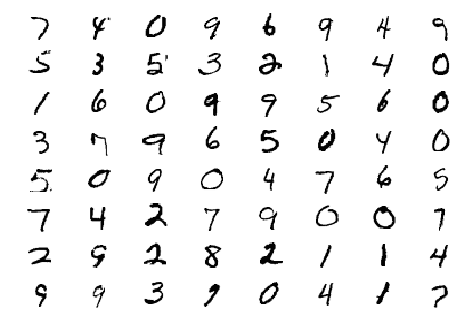

In [0]:
#random choose 8*8=64 images to have a good idea of our datasets.
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

In [0]:
model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Use tf.cast instead.


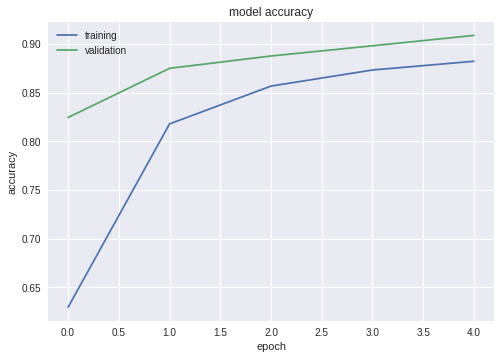

test loss:  0.4784633789539337
test accuracy:  0.8908


In [0]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print('test loss: ', loss)
print('test accuracy: ', accuracy)

In [0]:
model.save('my_model.h5')